## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cleaned_all.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

        Row No Date received                  Product  \
446       6874      09/09/16              Payday loan   
713      10840      08/07/15            Consumer Loan   
803      12248      08/07/16            Consumer Loan   
1153     17162      05/26/16            Consumer Loan   
1185     17642      11/05/15            Consumer Loan   
...        ...           ...                      ...   
126588  222826      09/21/16  Bank account or service   
126589  142174      03/05/16  Bank account or service   
126590   55888      01/23/17  Bank account or service   
126591  293505      09/27/16  Bank account or service   
126592  327087      09/28/15  Bank account or service   

                       Sub-product                                     Issue  \
446                           None  Charged fees or interest I didn't expect   
713                   Vehicle loan       Problems when you are unable to pay   
803                   Vehicle loan                Managing the loan or leas

In [2]:
df_concat = model.docvecs.vectors_docs

## One hot encoding and concatenating

In [3]:
vectors = model.docvecs.vectors_docs

In [4]:
one_hot = pd.Categorical(df['Product'])
df_dummies = pd.get_dummies(one_hot)

v_df = pd.DataFrame(vectors)
df_concat = pd.concat([v_df, df_dummies], axis = 1)
print(df_concat.shape)

(58035, 62)


## Applying UMAP

In [5]:
import umap
data_reduced = umap.UMAP().fit_transform(df_concat)

C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\umap\spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
C:\Users\l-Larsovic-l\anaconda3\lib\importlib\__init__.py:127: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.registry', please update to use 'numba.core.registry' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  return _bootstrap._gcd_import(name[level:], package, level)
C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\umap\spectral.py:106: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'CPUDispatcher' requested from: 'numba.targets.registry', please update to use 'numba.core.registry' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  ) == numba

In [6]:
print(data_reduced.shape)

(58035, 2)


## Applying k-means

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


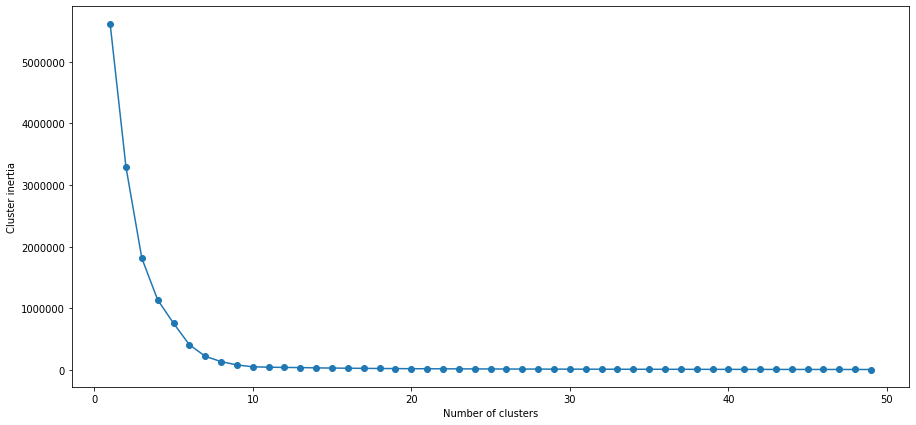

In [8]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Silhouette scores

For n_clusters = 4 The average silhouette_score is : 0.58329064
For n_clusters = 5 The average silhouette_score is : 0.65607846
For n_clusters = 6 The average silhouette_score is : 0.7385027
For n_clusters = 7 The average silhouette_score is : 0.79974735
For n_clusters = 8 The average silhouette_score is : 0.82976437
For n_clusters = 9 The average silhouette_score is : 0.8554579
For n_clusters = 10 The average silhouette_score is : 0.87380916
For n_clusters = 11 The average silhouette_score is : 0.8642523
For n_clusters = 12 The average silhouette_score is : 0.83908147
For n_clusters = 13 The average silhouette_score is : 0.76965576
For n_clusters = 14 The average silhouette_score is : 0.68256086
For n_clusters = 15 The average silhouette_score is : 0.66918725
For n_clusters = 16 The average silhouette_score is : 0.58634984
For n_clusters = 17 The average silhouette_score is : 0.56389415
For n_clusters = 18 The average silhouette_score is : 0.56238663
For n_clusters = 19 The average si

C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 24 The average silhouette_score is : 0.5008812


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 25 The average silhouette_score is : 0.52845526


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 26 The average silhouette_score is : 0.50294894


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 27 The average silhouette_score is : 0.50560796


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 28 The average silhouette_score is : 0.5087625


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 29 The average silhouette_score is : 0.50864893


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 30 The average silhouette_score is : 0.46719906


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 31 The average silhouette_score is : 0.50880593


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 32 The average silhouette_score is : 0.508548


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 33 The average silhouette_score is : 0.45953336


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 34 The average silhouette_score is : 0.45965445


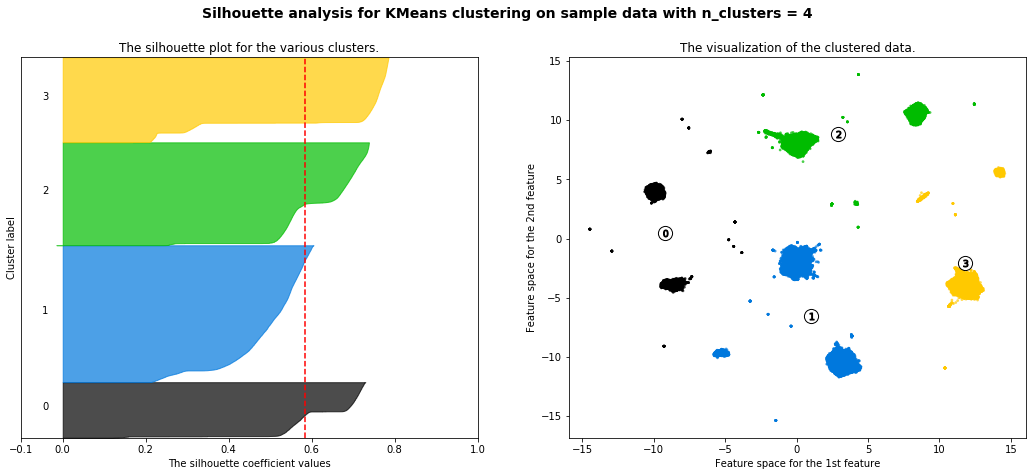

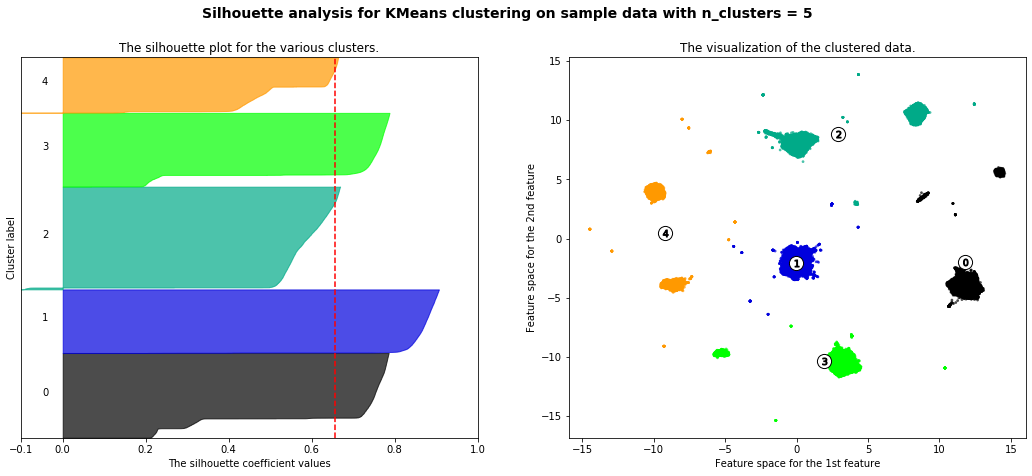

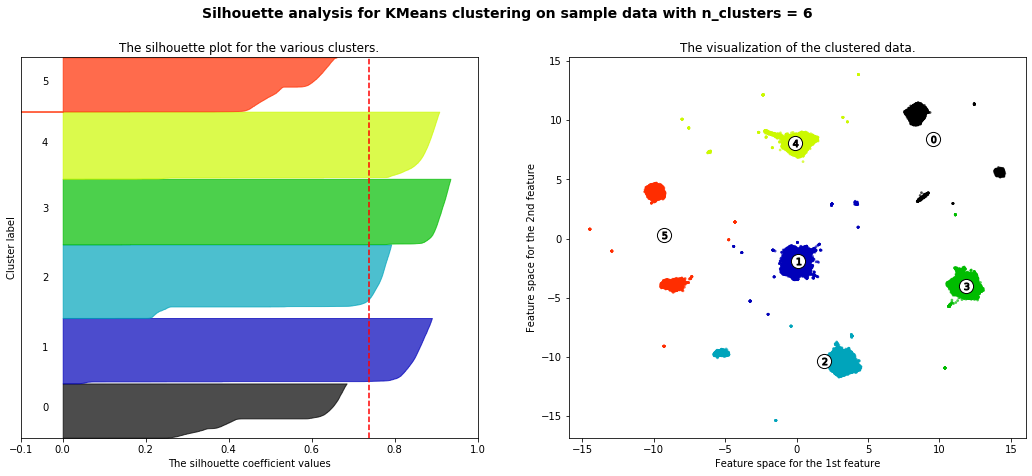

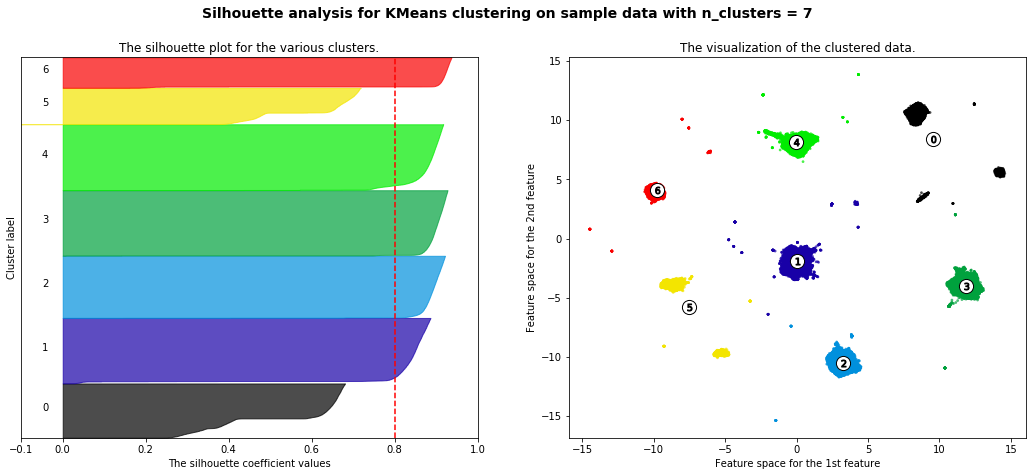

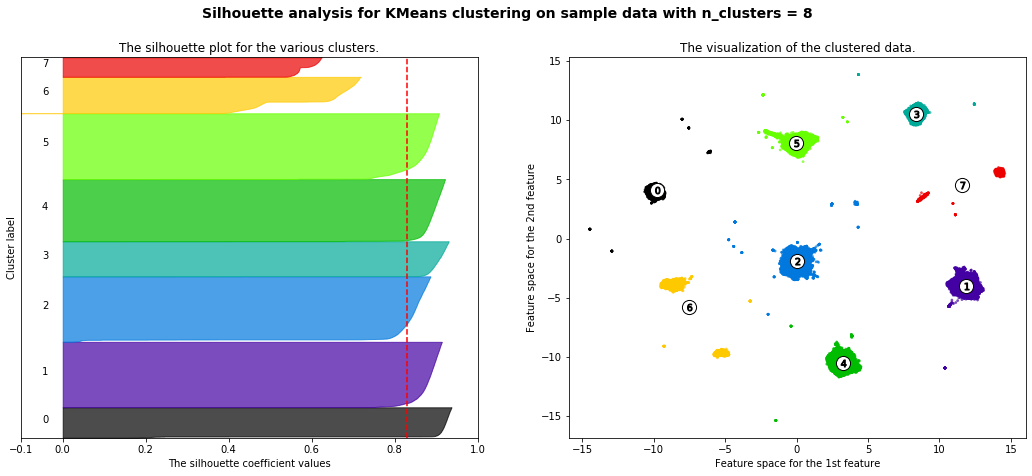

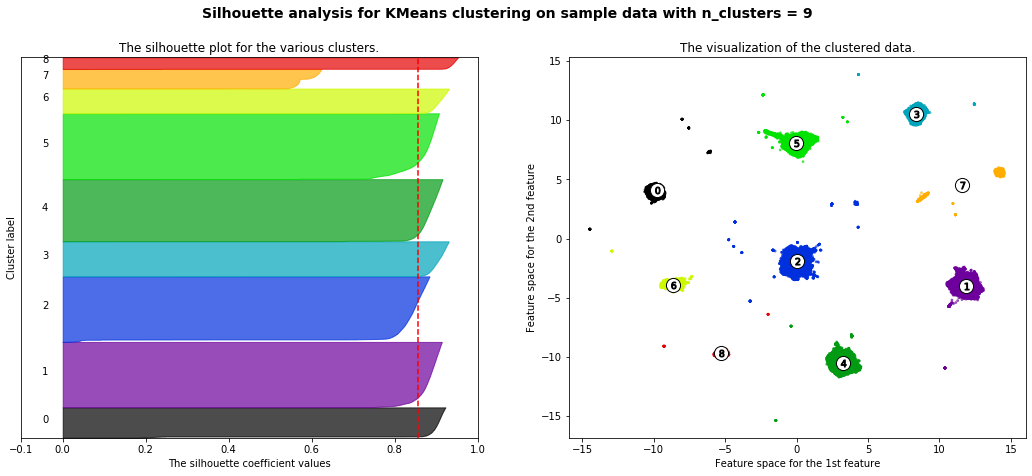

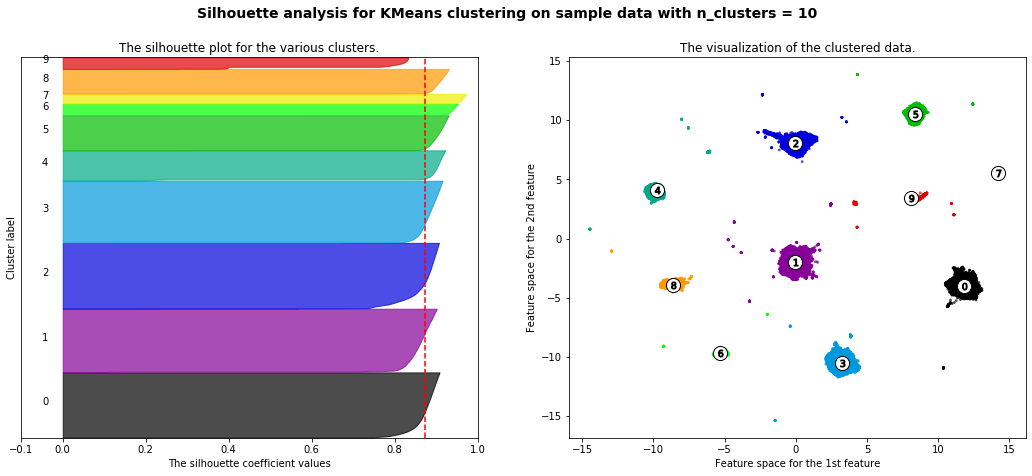

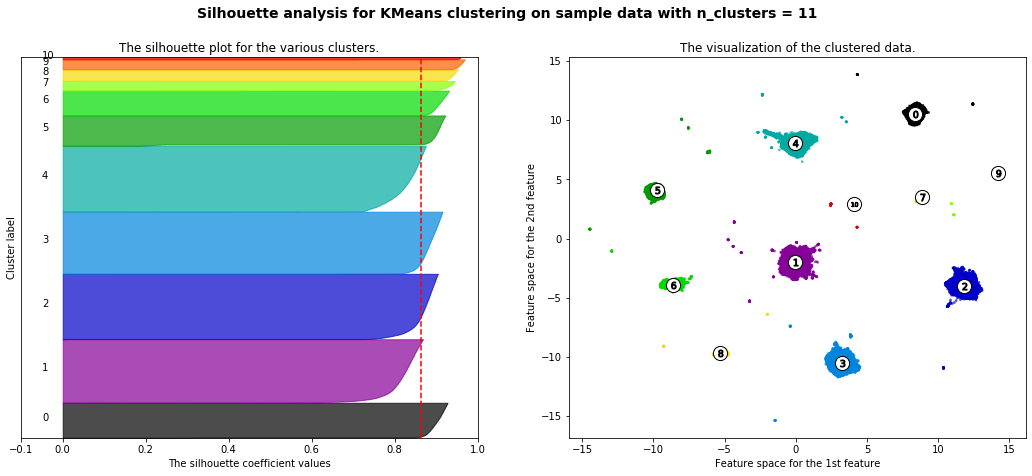

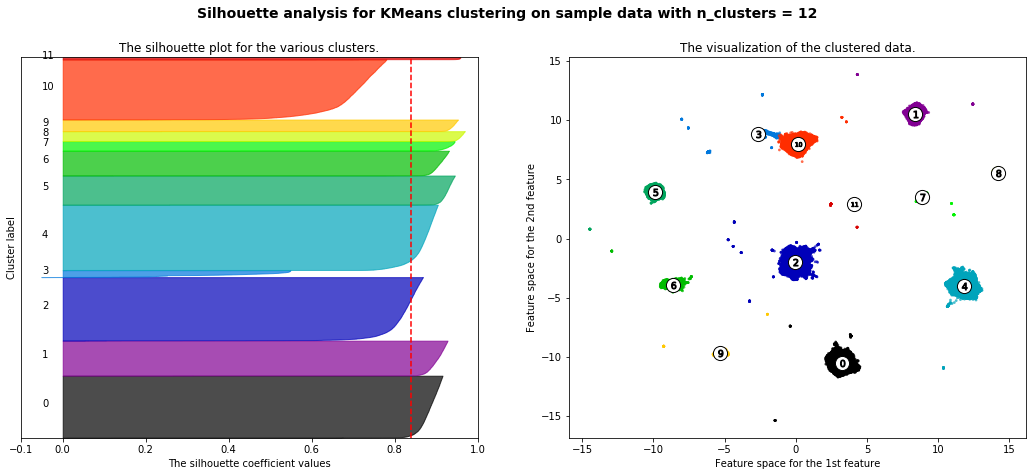

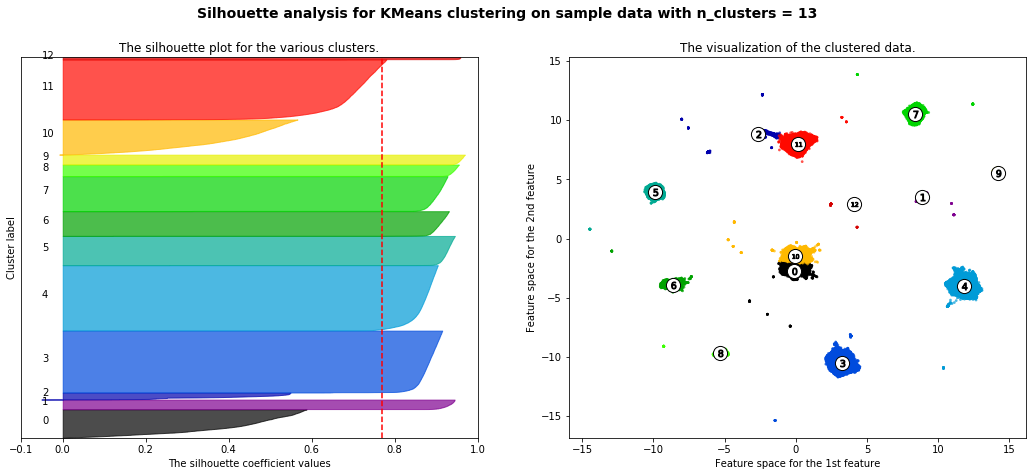

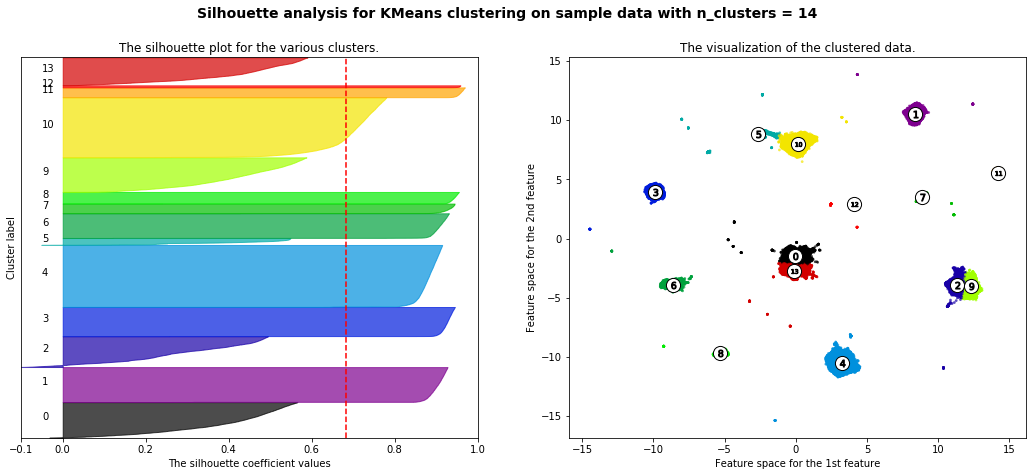

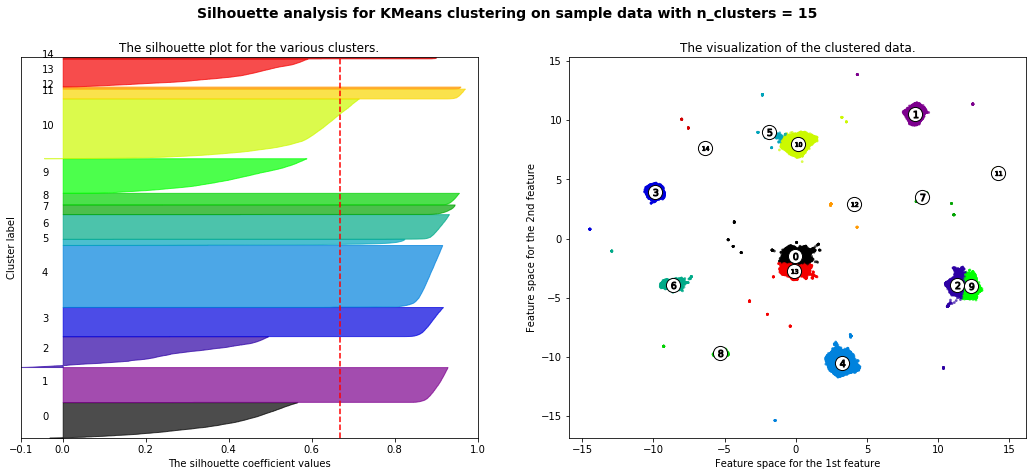

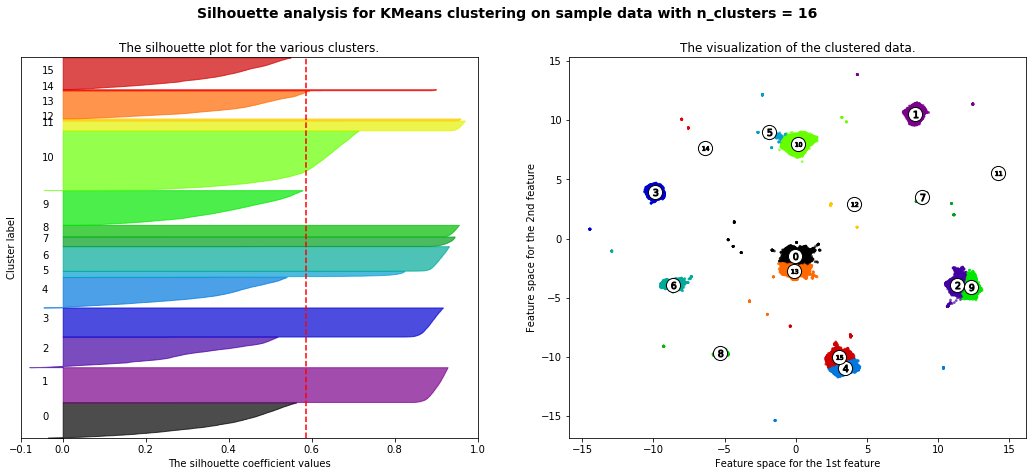

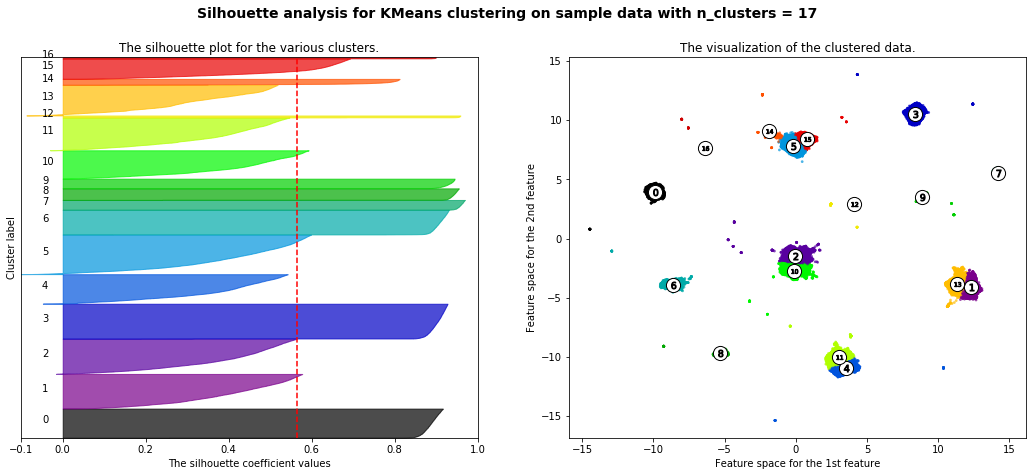

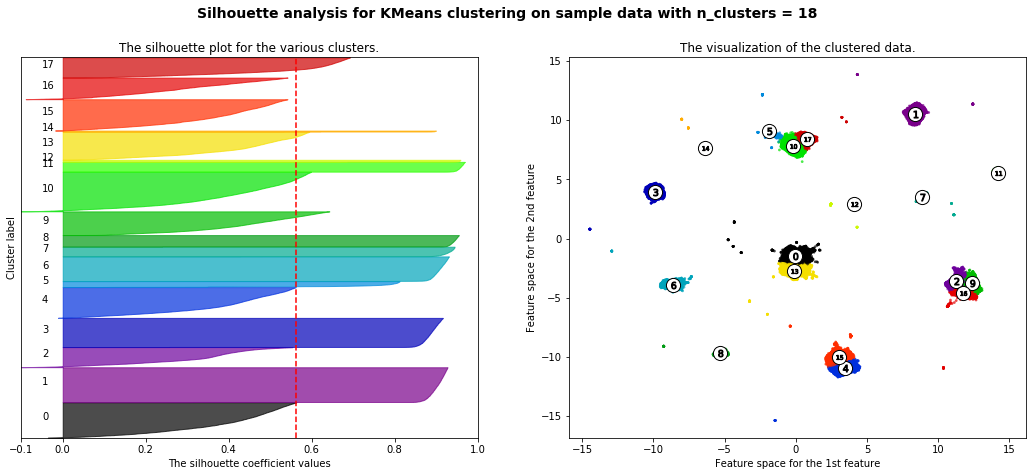

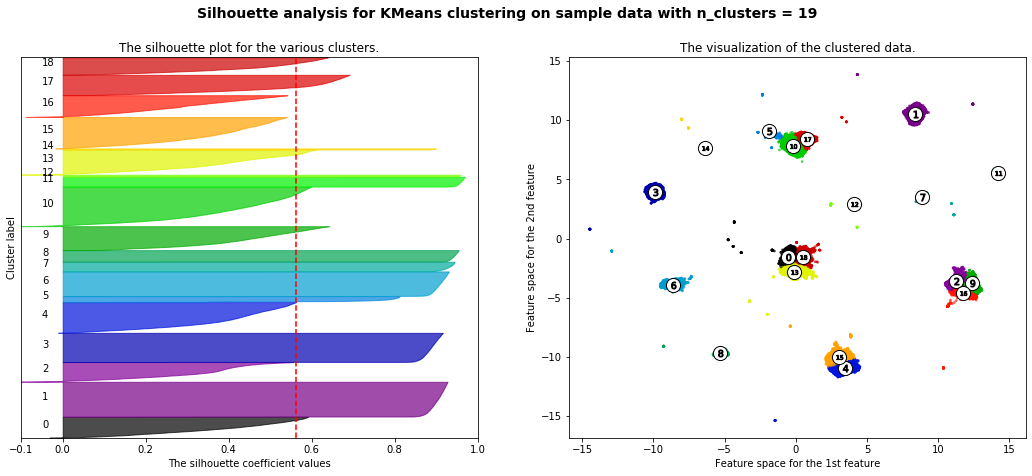

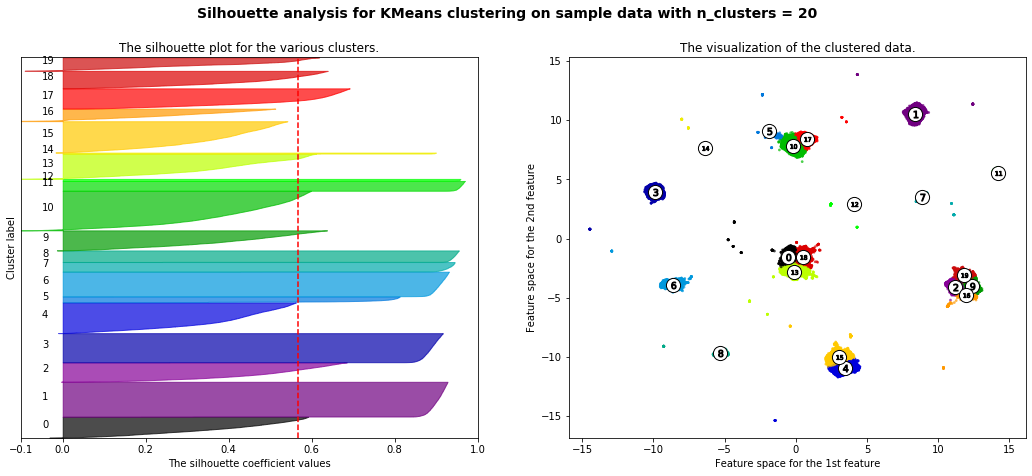

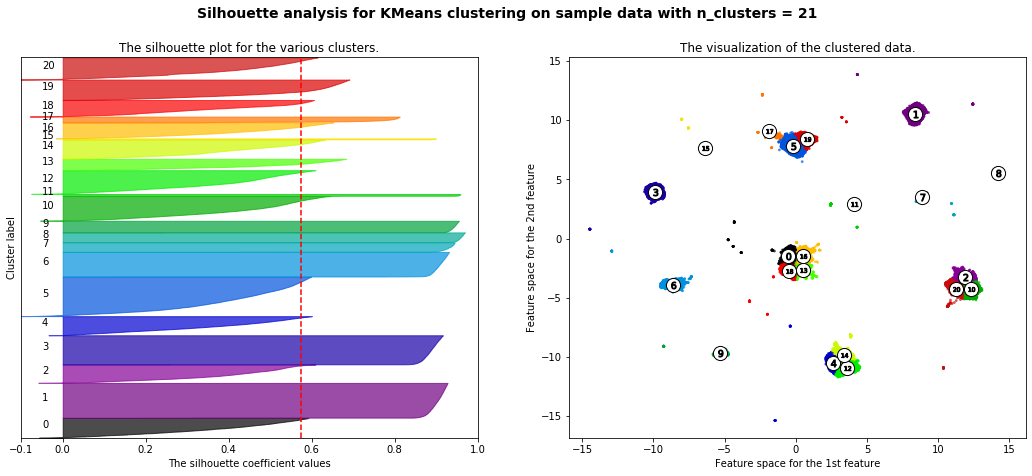

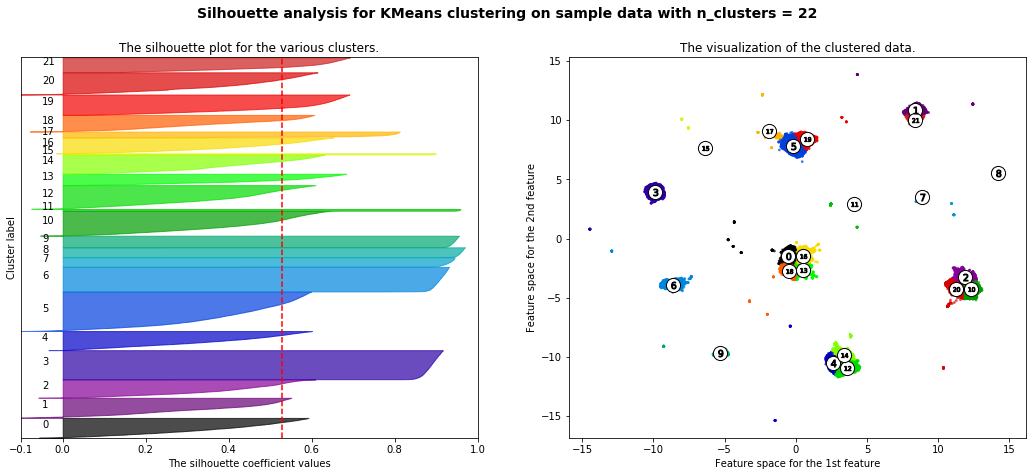

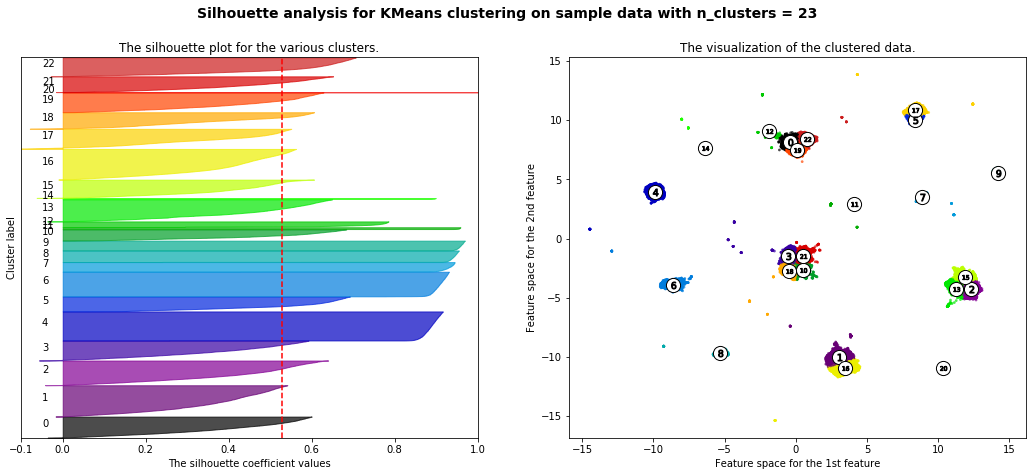

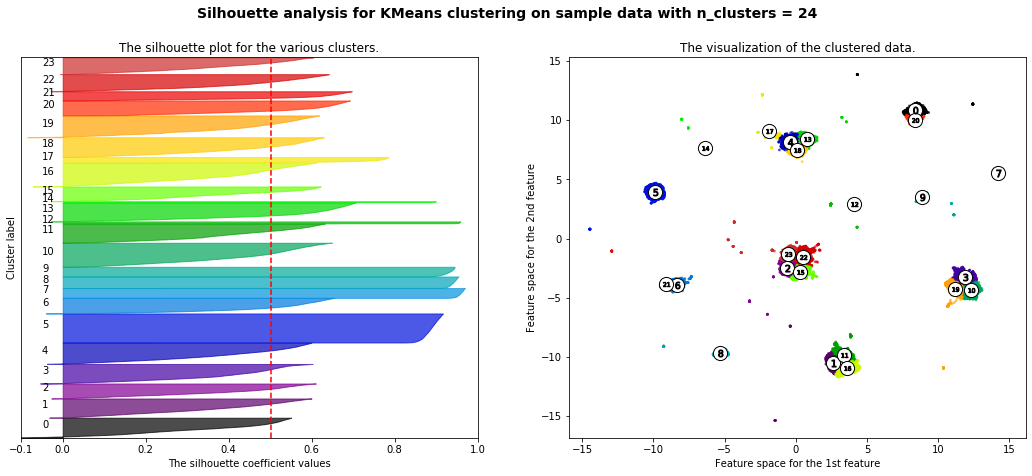

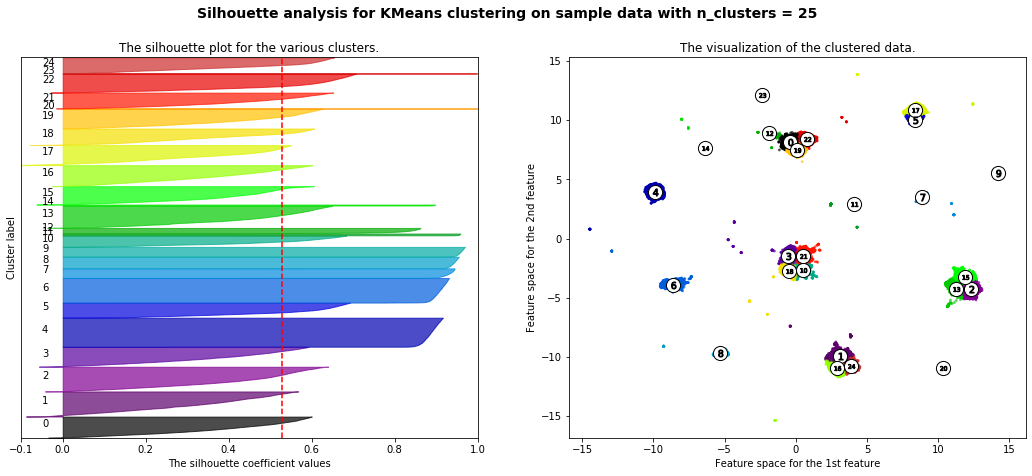

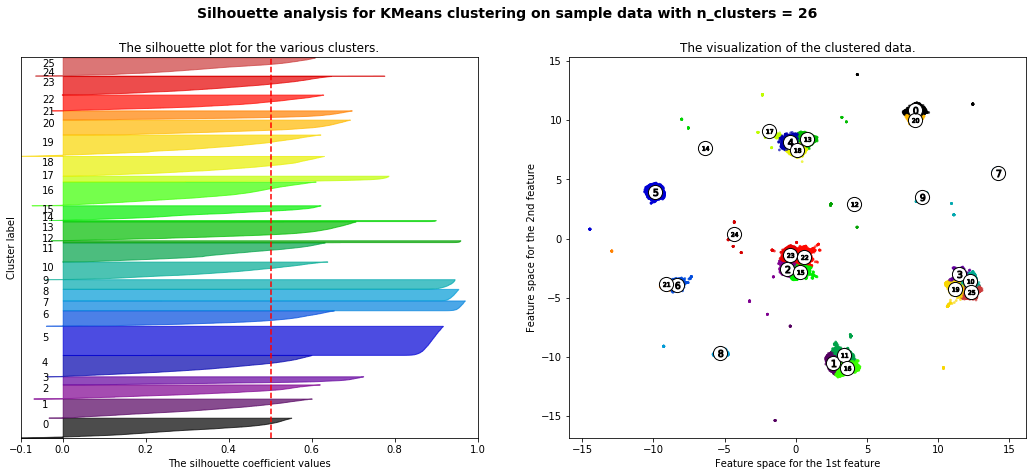

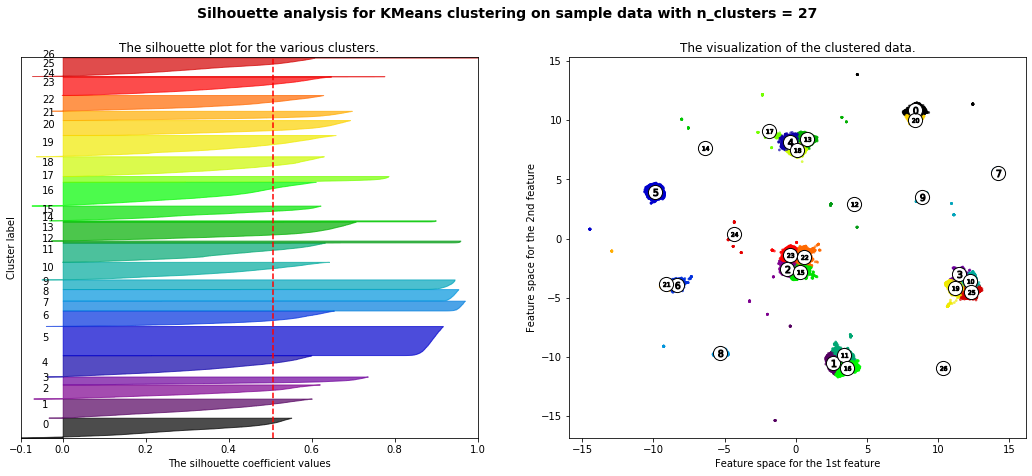

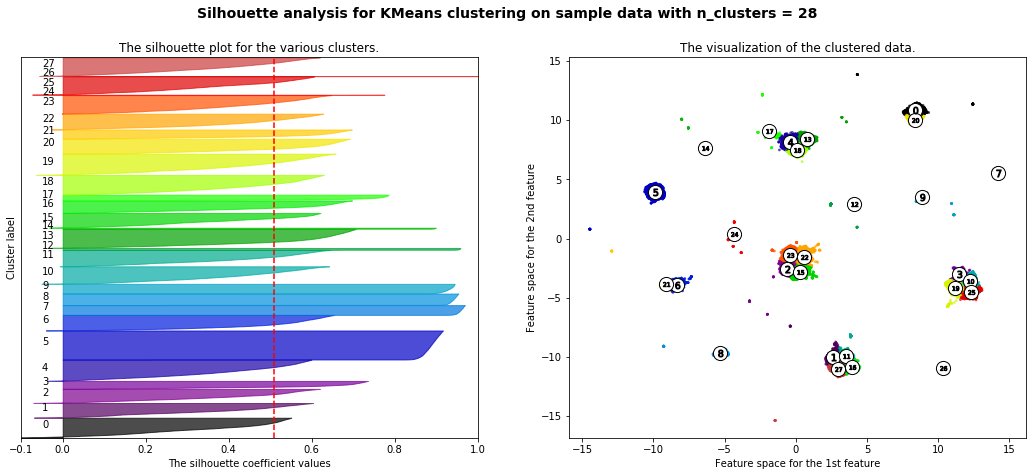

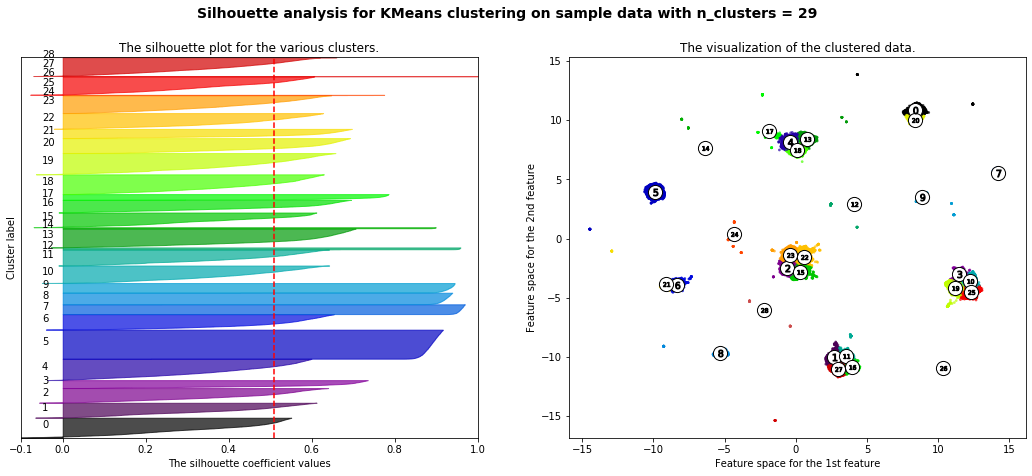

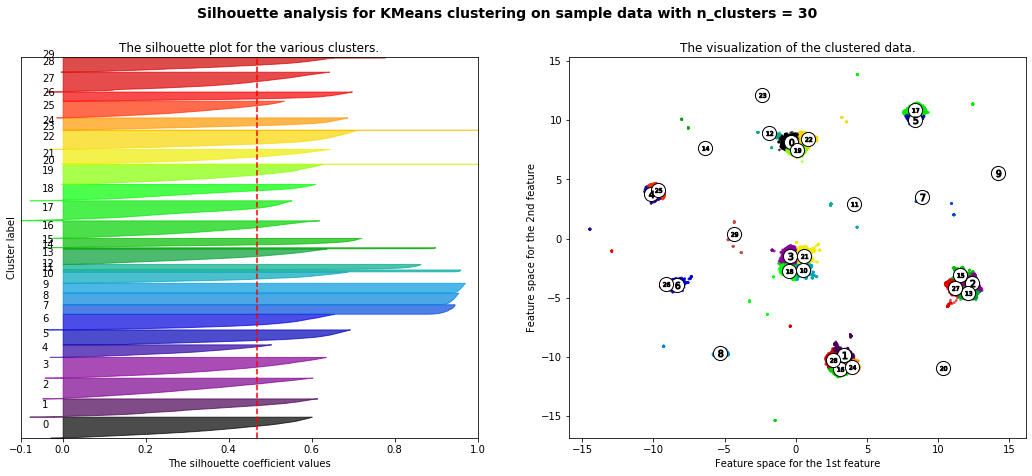

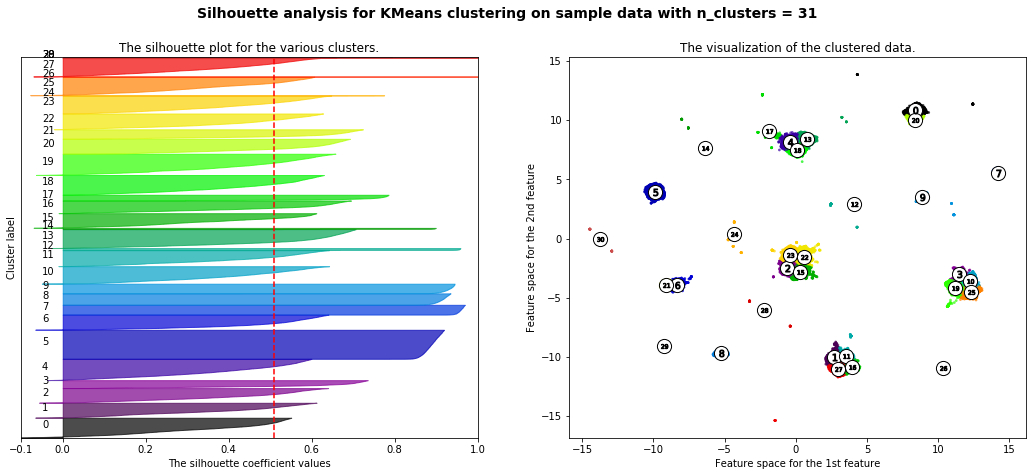

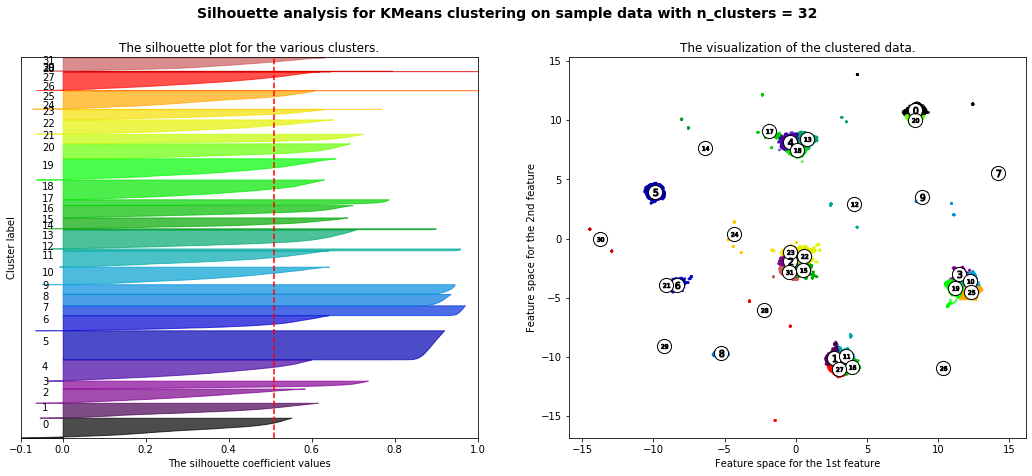

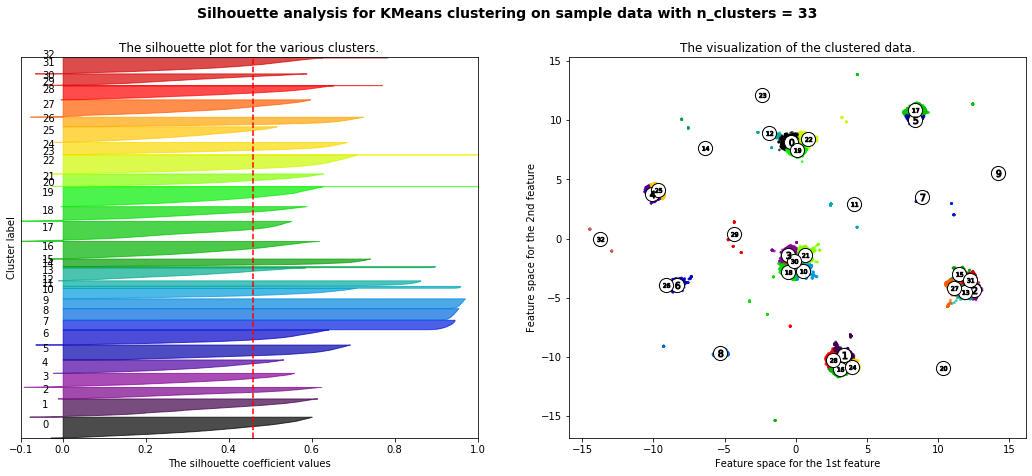

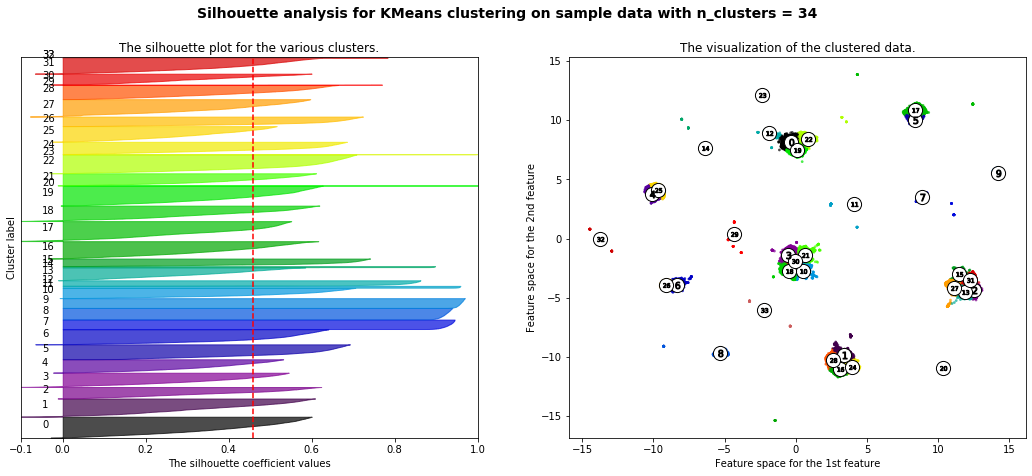

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(4,35):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Analyzing with narrative

In [14]:
number_clusters = 10
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

df_index = pd.DataFrame(indexes)

indici = []
for i in range(0,len(indexes)):
    indici.append(i)
df1 = df_index.set_index(pd.Index(indici))
df2 = df.set_index(pd.Index(indici))
df_result = pd.concat([df1,df2], axis = 1)
print(df_result)

       0  Row No Date received                  Product  \
0      8    6874      09/09/16              Payday loan   
1      0   10840      08/07/15            Consumer Loan   
2      0   12248      08/07/16            Consumer Loan   
3      0   17162      05/26/16            Consumer Loan   
4      0   17642      11/05/15            Consumer Loan   
...   ..     ...           ...                      ...   
58030  1  222826      09/21/16  Bank account or service   
58031  1  142174      03/05/16  Bank account or service   
58032  1   55888      01/23/17  Bank account or service   
58033  1  293505      09/27/16  Bank account or service   
58034  1  327087      09/28/15  Bank account or service   

                      Sub-product                                     Issue  \
0                            None  Charged fees or interest I didn't expect   
1                    Vehicle loan       Problems when you are unable to pay   
2                    Vehicle loan                Manag

Cluster number: 0
i was a military servicemember in prior to my discharge i had an auto loan through us bank which i never missed a single payment on after bieng my finances changed dramatically awaiting my va benifits i tried to work out a payment arrangment with us bank and they would not accept it they repossed the vehicle shortly after my months or so attempted to help us get current on the payments byt us bank would not allow it they said our only option was to pay the balance in full when asked why we were told because we violated the terms of the lease when we no longer had an allotment payment in place which was not even an option we later found out that us bank lost a lawsuit for these illegal practices but we never found out how to do anything about it it took almost years to start getting full va compensation and im we have tried to contact us bank to no avail and the remaining balance of this loan is still negative on my credit and hurting me and my family a great deal is t

on or about i purchached a from in ca for within two weeks the vehicle was towed they replaced a eater pump which again exploded cracking the block i requested they replace the engine severral times and they denied my request knowing and willingly they they closed the first contract to sever my right to sue and opened a new contract for the sale of a which also had mechanical problems when i took it in they advisrd of a rotor replacement and did not repair any other parts neededwhich ate up tires it was serviced on the last day of the warranty thereafter it was repossed and i lost my evidence while in sear h of an attorney and now have no car and bad credit 

i was injured on the job year ago got in touch with the company and explained my issue and they said they had a program to help me repay the debt i just had a prior to the i i set up a hardship repayment program loan with elan fian co and after i made first payment as we agreed over the phone i found they were still reporting me n

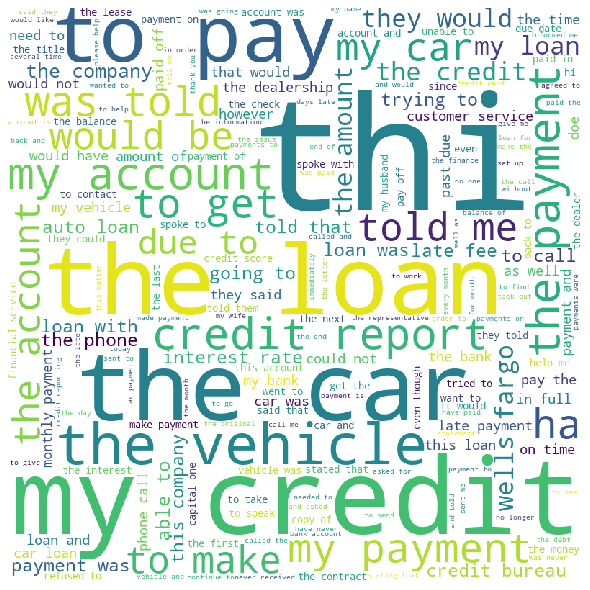

Cluster number: 1
wells fargo mother died in of in her belongings was an inactivated credit card all her accounts were closed and notice of her death provided by the end of in a credit card statement was received with a balance separate phone call attempts were made to a number given to deal with the credit card each time the automated voice comes on and states no one is available to answer your call it gives the hours of operation the calls were made within those hours and days a call was then made to wells fargo customer services which said it had to be handled by the credit card services and i was transferred to a person who said she could not access that account and sent me to a third number which answers with no one is available to take your call and it just hangs up 

wellsfargo refuses to discharge it s debt to the legal owner of that debt because they refuse to recognize the legal holder of that debt as the legal holder of that debt i have a check given to me by my employer cut

bank of america refuses to add beneficiary to accounts for attorney in fact presenting duly registered north carolina durable power of attorney 

i have had accounts with bank of america since with my last one being a account since or i sometimes get international wire transfers from my parents and even though they pay up in advance also for the receiving bank fees in this case bank of america bank of america intermittently tries to charge me the fees as well as they have done in of this year i do n t pay monthly fees on my checking account and never have i do n t use checks i do n t receive paper statements etc i ca n t do direct deposits and have not had any since since i have been injured since of and have been undergoing treatment since then and total checks are only paid by check which i have only been using my bank of america checking account to deposit them so basically i deposit checks every year with weeks in between each deposit every few years or so they suddenly decide to c

Number of entries: 10051


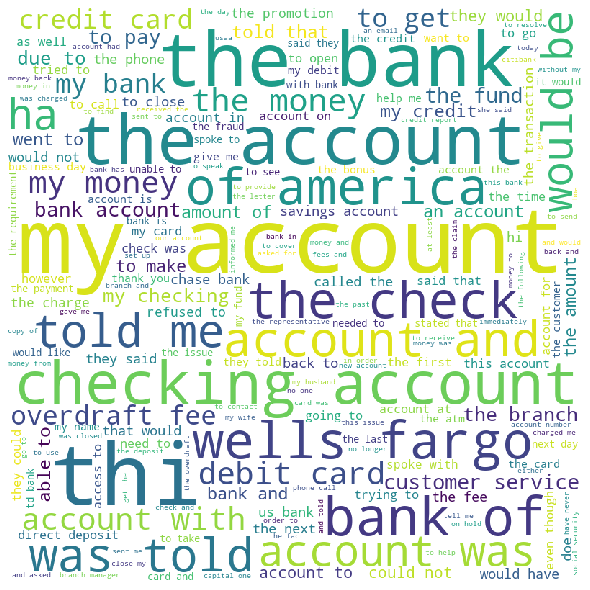

Cluster number: 2
my house recently burned down i ca n t get online or get a customer service representative on the phone i have been trying for a week now i am on hold for to minutes at a time and no one ever answers i do n t want this to go on my credit report but there is nothing else i can do 

summary i signed up for a credit card issued by the barclays bank delaware as a new customer i was supposed to receive a reward of miles for opening the account after meeting certain conditions see below for details the bank did not credit me these miles i reviewed the terms and conditions and i fulfilled all the requirements for getting the bonus of miles i called the bank and spoke to several representatives as well as her supervisor i read them the terms and conditions but their unanimous response was this is not how we do it details the terms and conditions of the credit card issued by barclays bank delaware state premier world mastercard cardmembers will receive bonus miles upon the fir

when i filled out the pre approval application for a discover it card they responded here s the card we found for you leading me to believe that i had indeed been pre approved but when i filled out the application i was denied discover has acknowledged to me that their pre approval language is misleading and that they intend to change that but that does n t do anything for me i m still a victim of their deceptive practices i would still like to obtain a discover card and can assure them that i am going to be a good long term customer but i m very discouraged by this practice 

i have had a chase credit card that is currently closed but i am still paying the balance i set up automatic payments but for some reason they have ceased and now they are charging me late fee after late fee and probably are reporting the account delinquent causing serious damage to my credit score i have not received any statements from them for this account either when i was made aware of the situation i attemp

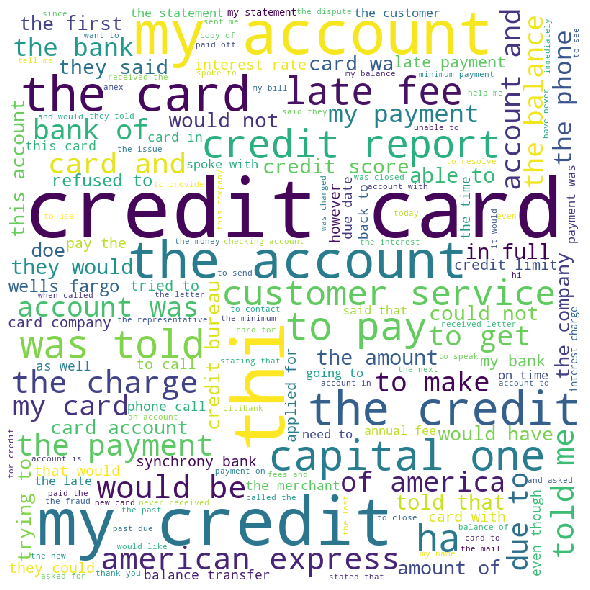

Cluster number: 3
this complaint was resolved by its removal from experian on this was my case number how do i get it removed from transunion and equifax i am disputing the only adverse account on my report which is for the amount of this entry is totally fraudulent and i am requesting that it be removed immediately here are the facts failed to provide service for the amount which was agreed to and subsequently terminated my service after ten months of service broke the agreement by not only overcharging me every month but also by terminating my services on when my bill was paid in full thru on friday at approximately when i called to complain about fraudulent charges being on my bill for the tenth month in a row immediately disconnected my services even though my bill was paid in full thru i can only assume that was tired of my continual complaining about the fraudulent charges every month so they decided to terminate my services when i repeatedly complained about the fraudulent charg

company has failed to respond within days

Number of entries: 9719


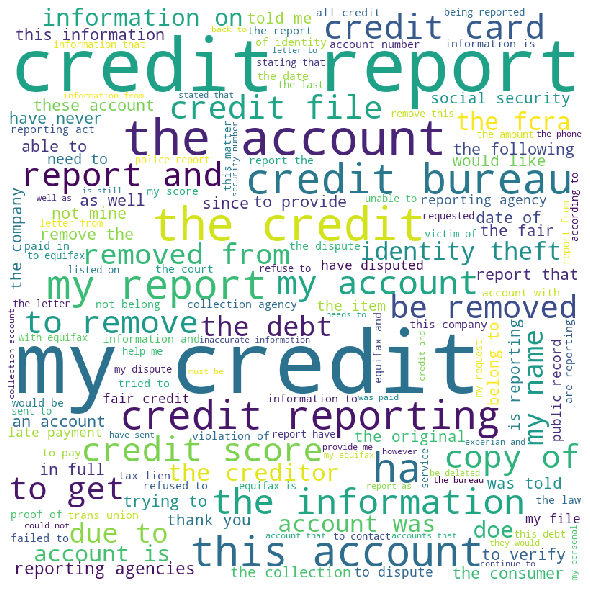

Cluster number: 4
i am filing this complaint because equifax has ignored my request to open investigation in regards to accounts listed on my credit report being that they have gone past the day mark and confirmation shows they have received my dispute over + days ago under section a of the fcra they are required to promptly delete all information which can not be verified that i have disputed please resolve this manner as soon as possible thank you 

interest that accure and the balloon interest that went on loan in the short period of time since navient taken over the loans unreasonable negotiating of lower my payments to an reasonable payments would not accept a reasonable payment arrangement even after i told them that i was homeless and without a job 

i first called before my loans were due to be paid i was seeking information about my repayment options knowing that my payment would likely be more than i could afford i was told the only way to discuss repayment options is to let 

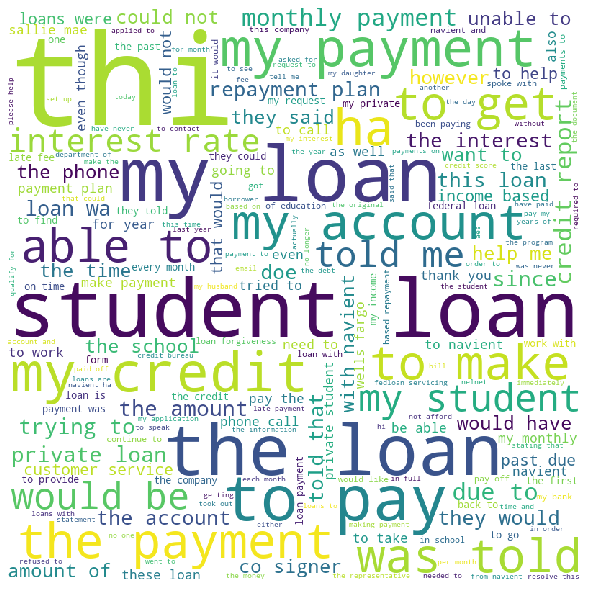

Cluster number: 5
this mortgage loan originated with pennymac loan services in approximately to purchase a new construction home for the address above all parties to the transaction including pennymac were aware that the collateral for this loan was new construction the first year taxes for this loan were paid on the land value only as normal with new construction and as both pennymac and myself were aware for the second year taxes would be calculated on the land value plus improvements to the property which would cause the amount due for taxes to increase when i received my escrow analysis from pennymac dated i received a surplus refund check from them in the amount my first thought was to review the amount they were collecting for my taxes knowing that this amount would increase with the value of the improvements adding on due to the new construction in reviewing the escrow analysis it appeared that they had taken that into account on the new escrow analysis as they increased the amo

on i signed contract to purchase a home for and this is what happened this house and approximately others are all built on the wrong lots and i am in litigation because i have been evicted from my own home the problem came in when a survey was performed that set an entire area of the plat off at least feet to the west my house is built feet to the east across the street from the actual property the deed states lot section but the house it built on lot section i paid a surveyor to survey this area and all he did was pull the old survey and stamp it and never went out to the property otherwise he would have known it was the wrong lot further digging into this due to the eviction lawsuit the county knew that the survey was off based upon a letter written in but still issued building permit for my house in i have been trying to work with the mortgage company but i am in default of the loans i have already paid thousands of dollars and down payments for a house i will not own the title poli

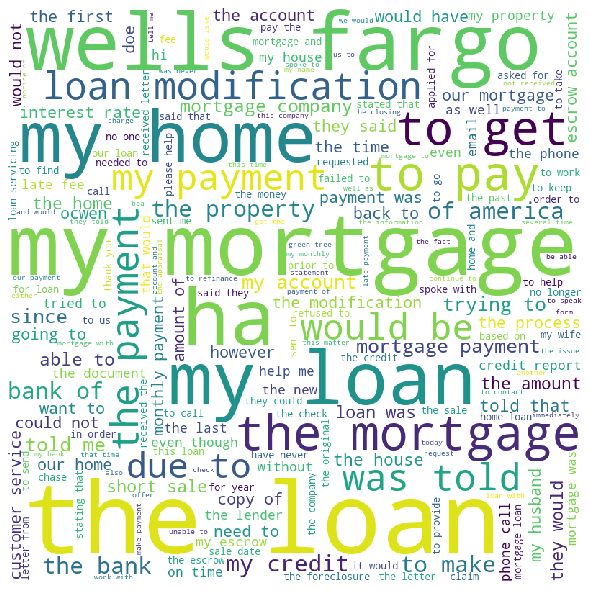

Cluster number: 6
Number of entries: 3776


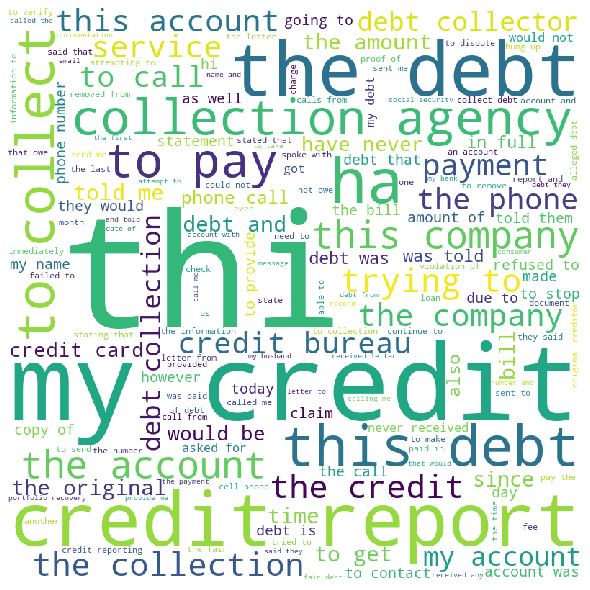

Cluster number: 7
moneygram is applying arbitrary rules to block legitimate transactions collecting unnecessary personal data and upon receipt of this information from me they are choosing not to offer the service they falsely advertised under false pretense with no recourse whatsoever to the consumer whose very personal information they now possess i verified this by attempting to send a dollar transaction to my friend in which is around dollars i was required to answer questions about the nature of our relationship when i last saw her where we met how often i see her and then was asked for the birthdates of several family members and a close friend and business associate i provided this information truthfully and patiently during a minute call where all my information was given to an offshore call center agent the end result was to be told that they would not send my transaction due to a decision by moneygram security which is an algorithm or amorphous intelligence appartus of a priv

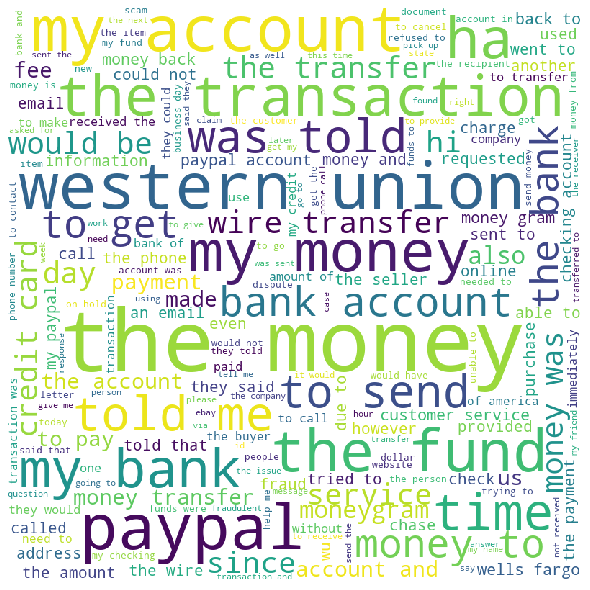

Cluster number: 8
its none of the issues i listed it is harrassment that has taken place im late on my payday loan which is my fault im now being harassed prior to being late before that i was on time every time my loan was almost paid off i did fall behind and had to speak with a lawyer about bankruptcy due to the harrassment i was receiving which i really did n t want to do because of course i wan na pay back the loan but the calls to my job threating me saying your coming to my job also telling me i didnt pay enough towards my loan i came in and gave what i had i was going to bring in what i had everyday just to try and get it paid the harrassment came from lvfinance employer and very rude people and i told them dont call my job if im answering your calls i spoke with and before he hung up he said im calling your job now which is un called for also he told me i will call you everyday which is fine i owe you but to say im coming to your job and tell my supervisor which is breach of p

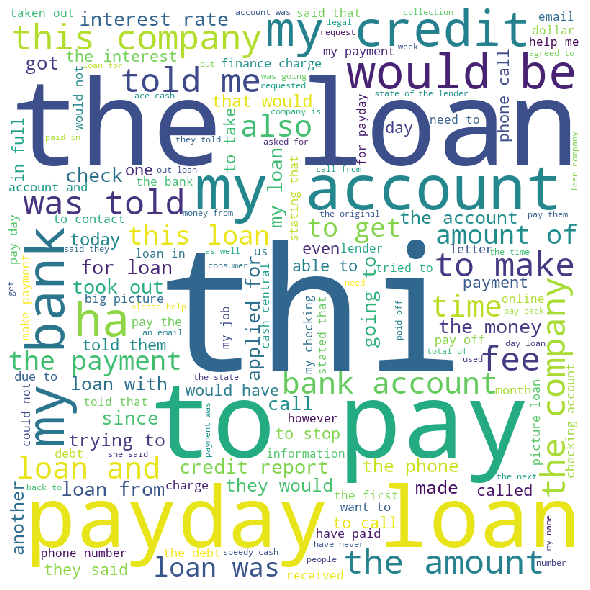

Cluster number: 9
was told i must purchase a pack to open a safe account on line to put my money in before i could access my money my prepaid card after loading my money onto my safe account i went through circle after circle of technical difficulties and i couldnt access my money after a month of trying to reconcile this problem i finally requested a refund of my money they said it would take business days to receive it after days came and gone still no money called cooperate office spoke with at blackhawk network she said some how refund was canceled she apologized and had no clue who did it then assured me i would have my refund in business days business days came and went still nothing called back again some one had some how canceled my refund yet again they apologized but will try and start refund process again which still will take another business days im not holding my breath 

on my online password pin number and security question answers were changed and an unauthorized debit

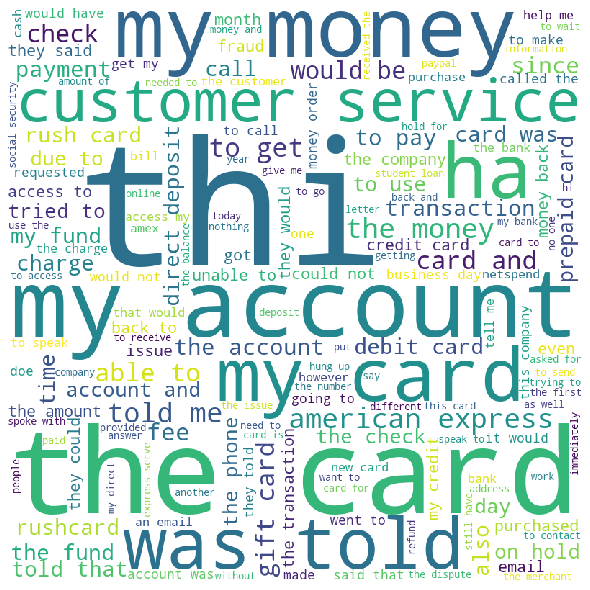

In [16]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
#nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')
stopwords.add('wa')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,1000)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


## Visualizing clusters

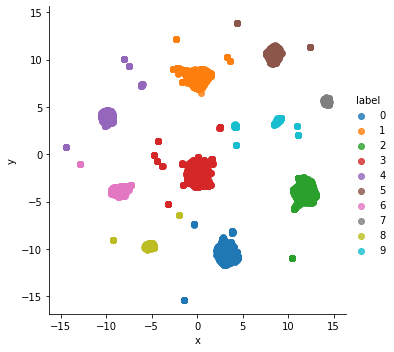

In [17]:
import seaborn as sns
_labels = pd.DataFrame(indexes)
labels = _labels.rename(columns={0: 'label'}) 

_reduced = pd.DataFrame(data_reduced)
reduced = _reduced.rename(columns={0: 'x', 1: 'y'}) 

clusters = pd.concat([reduced, labels], axis = 1)


facet = sns.lmplot(data=clusters, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
